### Classifying Fires in California between 2013 and 2020 Based on Severity


Important features in the dataset for this task include: AcresBurned, AdminUnit, AirTankers Counties, ArchiveYear, MajorIncident



In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

#loading in the data
data = pd.read_csv("California_Fire_Incidents.csv", header=0)

#modifying the data so it only contains relevant columns
data = data[['AcresBurned', 'AdminUnit', 'AirTankers', 'Counties', 'CrewsInvolved','Engines','Injuries', 'ArchiveYear', 'MajorIncident', 
             'StructuresDamaged', 'StructuresDestroyed','StructuresEvacuated', 'StructuresThreatened']]
#removing Mexico, Oregon and Nevada
data = data[~data['Counties'].isin(['Mexico', 'State of Oregon', 'State of Nevada'])]

#filling in missing values, fires with NaN acres burned are given the mean, 0 for NaN airtankers
data['AcresBurned'].fillna(data['AcresBurned'].mean(), inplace=True)
data['AirTankers'].fillna(0, inplace=True)
data['StructuresDamaged'].fillna(0, inplace=True)
data['StructuresDestroyed'].fillna(0, inplace=True)
data['StructuresEvacuated'].fillna(0, inplace=True)
data['StructuresThreatened'].fillna(0, inplace=True)
data['Engines'].fillna(0, inplace=True)
data['CrewsInvolved'].fillna(0, inplace=True)
data['Injuries'].fillna(0, inplace=True)



#encoding for Counties, AdminUnit and MajorIncident
# counties_dummies = pd.get_dummies(data['Counties'], prefix='County')
# data = pd.concat([data, counties_dummies], axis=1)
#data.drop('Counties', axis=1, inplace=True)

# admin_dummies = pd.get_dummies(data['AdminUnit'])
# data = pd.concat([data, admin_dummies], axis=1)
#data.drop('AdminUnit', axis= 1, inplace=True)

# incident_dummies = pd.get_dummies(data['MajorIncident'])
# data = pd.concat([data, incident_dummies], axis=1)
# data.drop('MajorIncident', axis=1, inplace=True)

### After preprocessing, the fire data is ready for splitting and getting fed to the models.

#### Classifier for if an incident is considered "Major"

KNN Accuracy: 0.7675840978593272
              precision    recall  f1-score   support

       False       0.81      0.91      0.86       250
        True       0.51      0.31      0.39        77

    accuracy                           0.77       327
   macro avg       0.66      0.61      0.62       327
weighted avg       0.74      0.77      0.75       327

RF Accuracy: 0.9235474006116208
              precision    recall  f1-score   support

       False       0.92      0.99      0.95       250
        True       0.95      0.71      0.81        77

    accuracy                           0.92       327
   macro avg       0.93      0.85      0.88       327
weighted avg       0.93      0.92      0.92       327

SVM Accuracy: 0.7767584097859327
              precision    recall  f1-score   support

       False       0.78      0.99      0.87       250
        True       0.75      0.08      0.14        77

    accuracy                           0.78       327
   macro avg       0.76      0

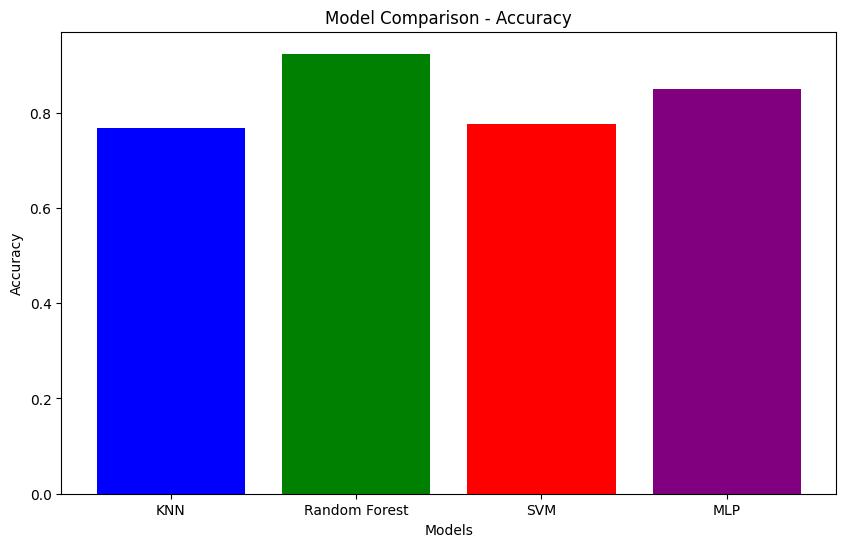

In [3]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#splitting based on MajorIncident
X = data[['AcresBurned', 'AirTankers', 'CrewsInvolved', 'Engines', 'Injuries', 'ArchiveYear', 'StructuresDamaged', 'StructuresDestroyed', 'StructuresEvacuated', 'StructuresThreatened']]
y = data['MajorIncident']

#train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#K-Nearest Neighor
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', metric='minkowski')
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, KNN_pred))
print(classification_report(y_test, KNN_pred))

#Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

#SVM
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

#Multi Layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, mlp_pred))
print(classification_report(y_test, mlp_pred))

#Graphing all the accuracies
models = ['KNN', 'Random Forest', 'SVM', 'MLP']
accuracies = [accuracy_score(y_test, KNN_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, svm_pred), accuracy_score(y_test, mlp_pred)]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

#TODO: Try out more models and a more robust testing system like GridSearchCV